# Natural Language Processing with Disaster Tweets

competition: https://www.kaggle.com/competitions/nlp-getting-started/overview

code: https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

## Presenting text as numerical data

In [2]:
# Sample text for training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [3]:
# Import CountVectorizer and create an instnace of it
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# Fit the CountVectorizer to the training data
vect.fit(simple_train)

# Transform the text messages in the training data to a document-term matrix
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [4]:
# Transform the text messages in the training data to a document-term matrix
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm


<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [5]:
# Convert the sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [6]:
# Examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns = vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [7]:
# Check the type of the document-term matrix
print(type(simple_train_dtm))

<class 'scipy.sparse._csr.csr_matrix'>


In [8]:
# Print the sparse matrix
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [9]:
# Example text for model testing
simple_test = ["Please don't call me"]

In [10]:
# Transform the test data to a document-term matrix
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [11]:
# Exmain vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns = vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


## Reading a text-based dataset to pandas

In [12]:
# read file into pandas using a relative path
sms = pd.read_csv('~/aiffel/data/spam.csv', encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🔍 Exploratory Data Analysis (EDA)

In [13]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham': 0, 'spam': 1})
sms

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [16]:
sms['message_len'] = sms.message.apply(len)
sms

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


<Axes: xlabel='message_len', ylabel='Count'>

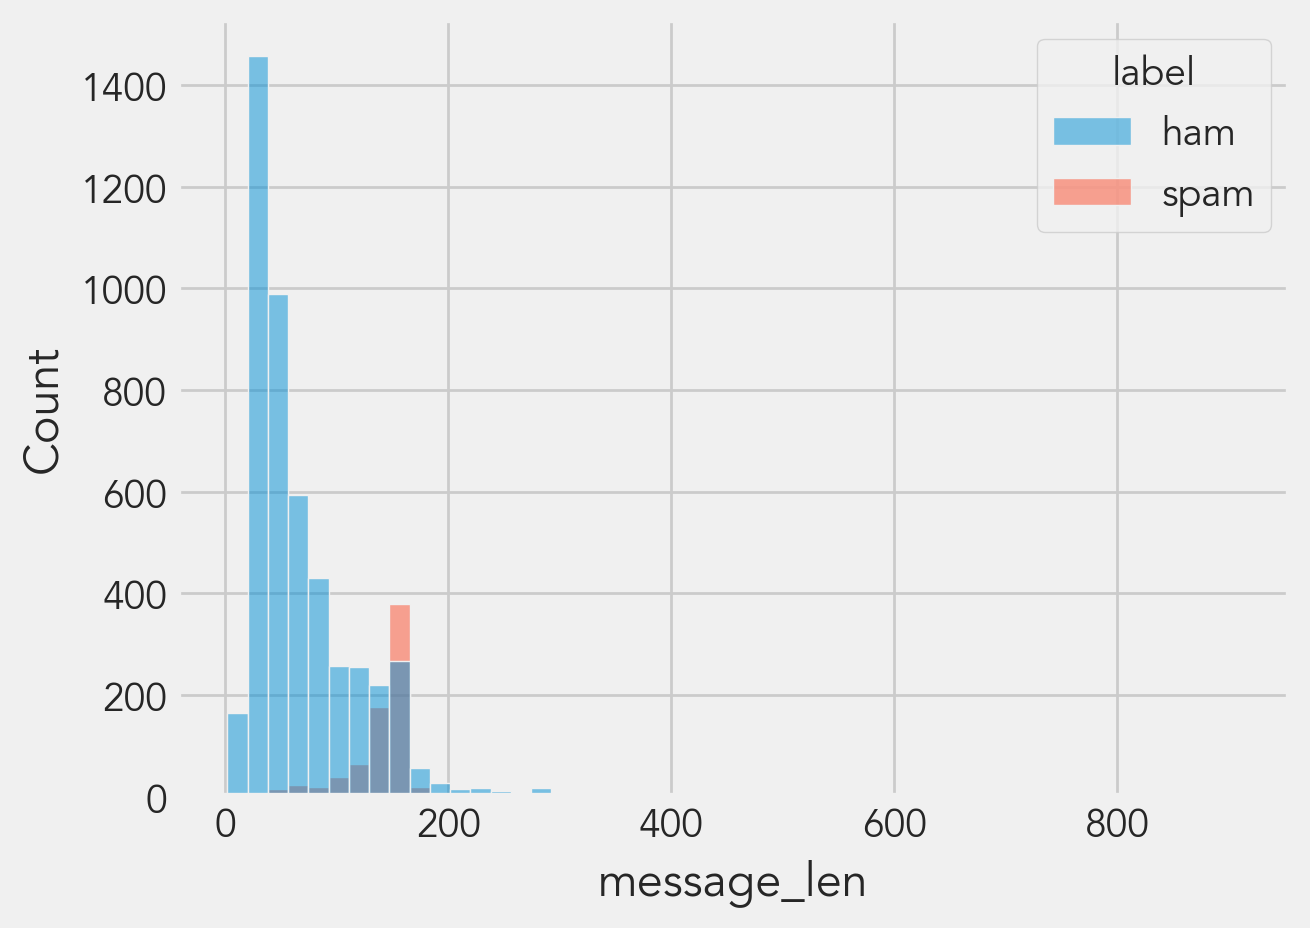

In [17]:
   sns.histplot(data = sms, x = 'message_len', kde=False, bins=50, hue=sms.label)

In [18]:
sms[sms['label'] == 'spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [19]:
sms[sms['label'] == 'ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [20]:
sms

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [21]:
sms[sms['message_len'] == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [22]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = '', join(nopunc)

    # Now just remove any stopwords]
    return ' ', join([word for word in nopunc.split() if word.lower() not in STOPWORDS])


In [23]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [24]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords]
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

sms['clean_msg'] = sms.message.apply(text_process)
sms

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,2nd time tried contact å£750 Pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,Ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity mood Soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...


In [25]:
type(stopwords.words('english'))

list

In [26]:
from collections import Counter

words = sms[sms['label'] == 'ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [27]:
words = sms[sms['label'] == 'spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


## Vectorization

In [40]:
# Split the data into train & test sets
from sklearn.model_selection import train_test_split

# Define X & y
X = sms['clean_msg']
y = sms['label_num']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# Learn training data vocabulary, and use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# Equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# Examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# Transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


In [50]:
vect.vocabulary_

{'height': 3459,
 'confidence': 2013,
 'aeronautics': 866,
 'professors': 5601,
 'wer': 7643,
 'calld': 1650,
 'amp': 988,
 'askd': 1123,
 'sit': 6350,
 'aeroplane': 867,
 'aftr': 883,
 'sat': 6071,
 'told': 7142,
 'dat': 2234,
 'plane': 5396,
 'ws': 7814,
 'made': 4447,
 'students': 6722,
 'dey': 2359,
 'hurried': 3666,
 'bt': 1567,
 'didnt': 2375,
 'move': 4764,
 'saidif': 6042,
 '22': 380,
 '146tf150p': 289,
 'wen': 7638,
 'lovable': 4364,
 'bcums': 1299,
 'angry': 1002,
 'wid': 7689,
 'dnt': 2444,
 'take': 6872,
 'seriously': 6193,
 'coz': 2103,
 'childish': 1847,
 'true': 7237,
 'way': 7585,
 'showing': 6293,
 'deep': 2291,
 'affection': 871,
 'care': 1702,
 'luv': 4414,
 'kettoda': 4032,
 'manda': 4481,
 'nice': 4926,
 'day': 2246,
 'da': 2197,
 'long': 4330,
 'time': 7089,
 'remember': 5841,
 'today': 7127,
 'dear': 2264,
 'voucher': 7505,
 'holder': 3554,
 'claim': 1885,
 '1st': 352,
 'class': 1892,
 'airport': 920,
 'lounge': 4361,
 'passes': 5268,
 'using': 7403,
 'holiday': 

In [51]:
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

## Building and evaluation model

In [58]:
# Import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [59]:
# Train the model with X_train_dtm
%time nb.fit(X_train_dtm, y_train)

CPU times: user 1.95 ms, sys: 1.14 ms, total: 3.08 ms
Wall time: 2.27 ms


MultinomialNB()

In [60]:
from sklearn import metrics

# Make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred_class))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

0.9827709978463748
[[1205    8]
 [  16  164]]
